### Plot and analysis of the Sample

In [266]:
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
import pickle
import numpy as np

%matplotlib inline

In [267]:
### Load the pickle
def load_pickle(filein):
    f = open(filein,'r')
    sample = pickle.load(f)
    f.close()
    
    return(sample)

In [268]:
### save pickle
def save_pickle(fileout,data):
    f = open(fileout,'w')
    pickle.dump(data, f)
    f.close()

In [269]:
def plot_sample(sample):
    
    ral  = []
    decl = []
    area = []
    colors = []
    
    for gal in sample:
        ral.append(gal['Coord'][0])
        decl.append(gal['Coord'][1])
        area.append(gal['Vel'] / 10)
        colors.append(gal['Vel'] / 150)
        
          
    ral = np.array(ral)
    decl = np.array(decl)
    
    ra = coord.Angle(ral*u.degree) 
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(decl*u.degree)
    
    ##
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.scatter(ra.radian, dec.radian,s=area, c=colors, alpha=0.5)


In [270]:
def filter_photometry(sample, name,valuemin, valuemax):
    "Select a subsample by filtering on the photometry"
    
    subsample = []
    
    for gal in sample:
        photometryOK = False
        for phot in gal['Photometry']:
            #print phot[1]
            if name in phot[1]:
                val = float(phot[2])
                
                if val > valuemin and val < valuemax:
                    print phot[2]
                    photometryOK = True
        
        if photometryOK:
            subsample.append(gal)
                
    return(subsample)

#### plots and filtering...

15.1878
11.1116
15.0072
11.3836
12.7029
15.0351
14.852
11.3123
14.0662
10.6955
11.7934
15.8323
15.6379
11.9258
14.0101
12.2659


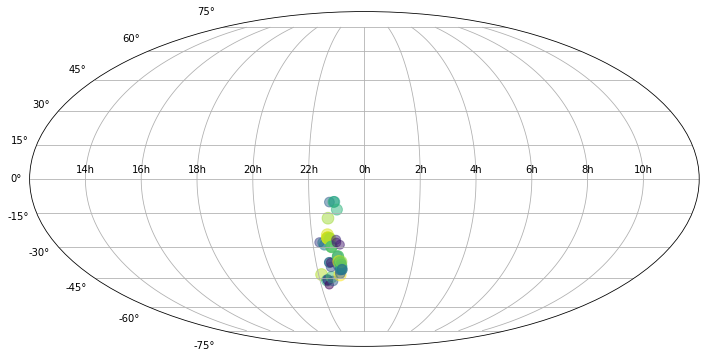

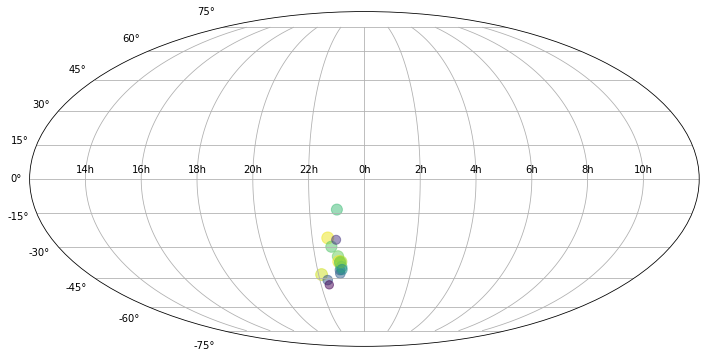

In [271]:
filein = 'sampleGalTest.pkl'
sampleGal = load_pickle(filein)

plot_sample(sampleGal)

## test filter
band = "60 microns (IRAS)"
band = "B_J"
subsample = filter_photometry(sampleGal,band, 0., 22000.)
save_pickle("sampleFilteredGalTest.pkl",subsample)

plot_sample(subsample)
